### Investigate number_of_learners > 40 outliers

Problem:

number_of_learners is normally distributed with a large number
of outliers over 40

In [1]:
%%capture

%run '../lib/libraries.ipynb'

In [2]:
filterDf = load_df('filterDf')
rawDf = load_df('rawDf')

#### Display histogram

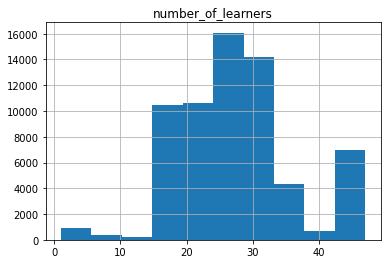

In [3]:
out = filterDf.select('number_of_learners').toPandas().hist()

- Just under 10,000 over 40 learners
- Normally distributed

#### Compare Full vs Filtered Dataset
- Is the difference from filtering by Fully Scored?
- Filtered dataset is only "Fully Scored" observations

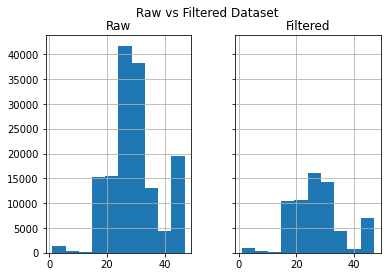

In [4]:
dual_hist(
    rawDf.select('number_of_learners').toPandas(),
    filterDf.select('number_of_learners').toPandas(),
    title1='Raw',
    title2='Filtered',
    main='Raw vs Filtered Dataset'
)

- No Difference (except for qty)
- Not from filtering

#### Filtered Calculated
- Add recalculation the number_of_learners

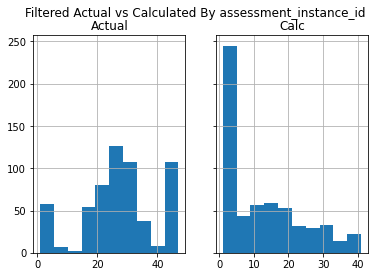

In [5]:
# Calculate number of learners on Filtered
dfCount = filterDf.groupBy('assessment_instance_id', 'number_of_learners').agg(
F.countDistinct('learner_id').alias('number_of_learners_calc')
)

dfPd = dfCount.toPandas()


dual_hist(
    dfPd['number_of_learners'],
    dfPd['number_of_learners_calc'],
    title1='Actual',
    title2='Calc',
    main='Filtered Actual vs Calculated By assessment_instance_id'
)

- Significantly Different
- Calculated
  - Normal distribution with outliers
    - Outliers at 1 to 5 and 40
  - Or, Skewed Right Normal distribution

#### Conclusion
- Variable won't be used
- No further action needed


In [6]:
finish_todo('Investigate number_of_learners > 40 outliers')

Finished: Investigate number_of_learners > 40 outliers
